In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install PyGithub

     -------------------------------------- 342.1/342.1 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install --upgrade notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Importation du dataset

In [4]:
statlog=pd.read_csv('Heart_disease_statlog.csv')

# EDA

In [5]:
statlog

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0


In [6]:
#cp:Type de douleur thoracique ressentie par le patient. Ce terme classé en 4 catégories. 
##0 angine typique, 1 angine atypique, 2 douleurs non angineuses, 3 asymptomatiques (Nominal)
#trestbps : niveau de pression artérielle du patient au repos en mm/HG (Numérique)
#chol : Cholestérol sérique en mg/dl (Numérique)
#fbs : les niveaux de sucre dans le sang à jeun > 120 mg/dl représentent 1 en cas de vrai et 0 en cas de faux (nominal)
#restecg : les résultats de l'électrocardiogramme au repos sont représentés en 3 valeurs distinctes
##0 : Normal 1 : présentant une anomalie de l'onde ST-T (inversions de l'onde T et/ou sus-décalage ou dépression du ST de >
##0,05 mV) 2 : montrant une hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes (nominal)
#thalach : Fréquence cardiaque maximale atteinte (Numérique)
#exang : Angine induite par l'exercice 0 représentant NON 1 représentant Oui (Nominal)
#oldpeak : Dépression ST induite par l'exercice par rapport à l'état de repos (Numérique)
#slope : segment ST mesuré en termes de pente pendant l'exercice de pointe
##0 : en pente ascendante ; 1 : plat ; 2 : vers le bas en pente (nominal)
#ca : le nombre de navires principaux (0 à 3) (nominal)
#thal : une maladie du sang appelée thalassémie
##0 : NULL 1 : flux sanguin normal 2 : défaut fixe (pas de flux sanguin dans une partie du cœur) 
##3 : défaut réversible (un flux sanguin est observé mais il n'est pas normal (nominal)
#target: C'est la variable cible que nous devons prédire 1 signifie que le patient souffre d'une maladie cardiaque et
##0 signifie que le patient est normal.

In [7]:
statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [8]:
statlog[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,270.000000,270.000000,270.000000,270.000000,270.00000
mean,54.433333,131.344444,249.659259,149.677778,1.05000
std,9.109067,17.861608,51.686237,23.165717,1.14521
min,29.000000,94.000000,126.000000,71.000000,0.00000
25%,48.000000,120.000000,213.000000,133.000000,0.00000
50%,55.000000,130.000000,245.000000,153.500000,0.80000
75%,61.000000,140.000000,280.000000,166.000000,1.60000
max,77.000000,200.000000,564.000000,202.000000,6.20000


In [9]:
statlog.groupby('sex').target.count()

sex
0     87
1    183
Name: target, dtype: int64

In [10]:
statlog.groupby('sex').target.sum()

sex
0     20
1    100
Name: target, dtype: int64

In [11]:
statlog.groupby('cp').target.sum()

cp
0     5
1     7
2    17
3    91
Name: target, dtype: int64

In [12]:
statlog[statlog['trestbps']>=131.344444].target.sum()

58

In [13]:
statlog[statlog['chol']>=249.659259].target.sum()


66

In [14]:
statlog.groupby('fbs').target.sum()

fbs
0    103
1     17
Name: target, dtype: int64

In [15]:
statlog.groupby('restecg').target.sum()

restecg
0    46
1     1
2    73
Name: target, dtype: int64

In [16]:
statlog[statlog['thalach']>=149.677778].target.sum()


44

In [17]:
statlog.groupby('exang').target.sum()

exang
0    54
1    66
Name: target, dtype: int64

In [18]:
statlog[statlog['oldpeak']>=1.05].target.sum()


73

In [19]:
statlog.groupby('slope').target.sum()

slope
0    32
1    78
2    10
Name: target, dtype: int64

In [20]:
statlog.groupby('ca').target.sum()

ca
0    40
1    38
2    26
3    16
Name: target, dtype: int64

In [21]:
statlog.groupby('thal').target.sum()

thal
1    33
2     8
3    79
Name: target, dtype: int64

In [22]:
statlog.target.sum()

120

(array([ 6., 26., 47., 68., 76., 41.,  6.]),
 array([29.        , 35.85714286, 42.71428571, 49.57142857, 56.42857143,
        63.28571429, 70.14285714, 77.        ]),
 <BarContainer object of 7 artists>)

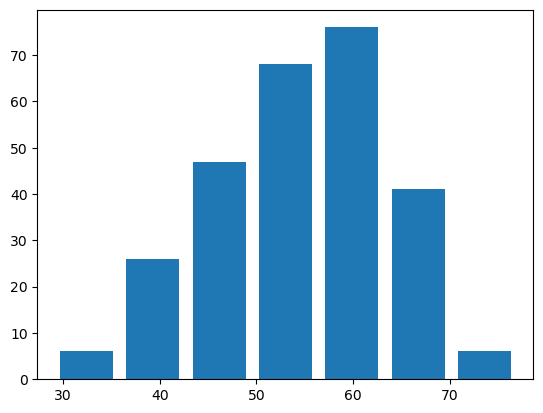

In [23]:
plt.hist(statlog.age,bins=7,rwidth=0.8)

<AxesSubplot:xlabel='age'>

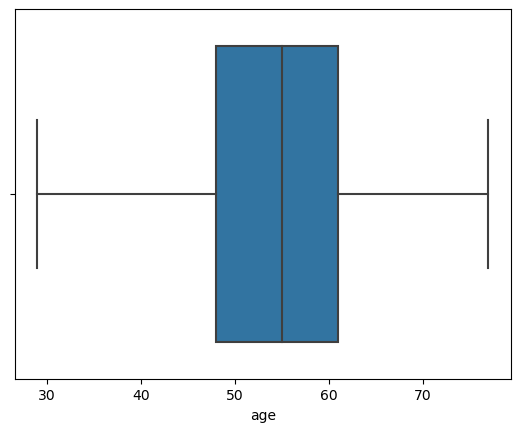

In [24]:
sns.boxplot(x='age',data=statlog)

<AxesSubplot:xlabel='sex', ylabel='count'>

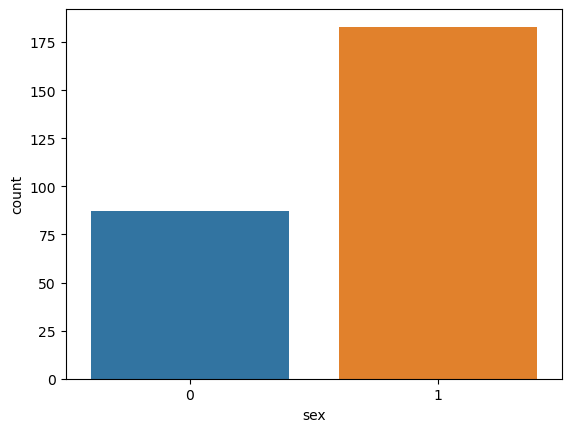

In [25]:
sns.countplot(x='sex',data=statlog)

<AxesSubplot:xlabel='target', ylabel='count'>

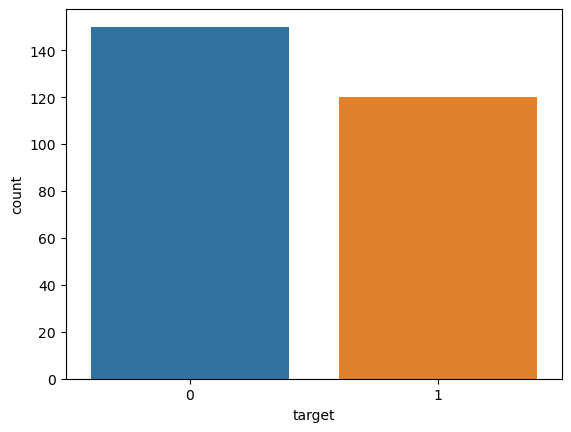

In [26]:
sns.countplot(x='target',data=statlog)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='target'>

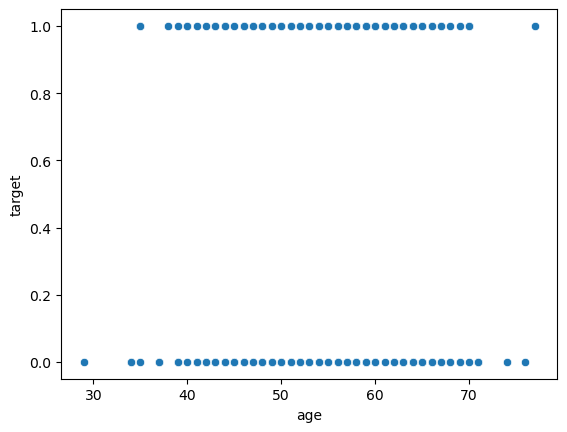

In [27]:
sns.scatterplot(statlog.age,statlog.target)

<AxesSubplot:>

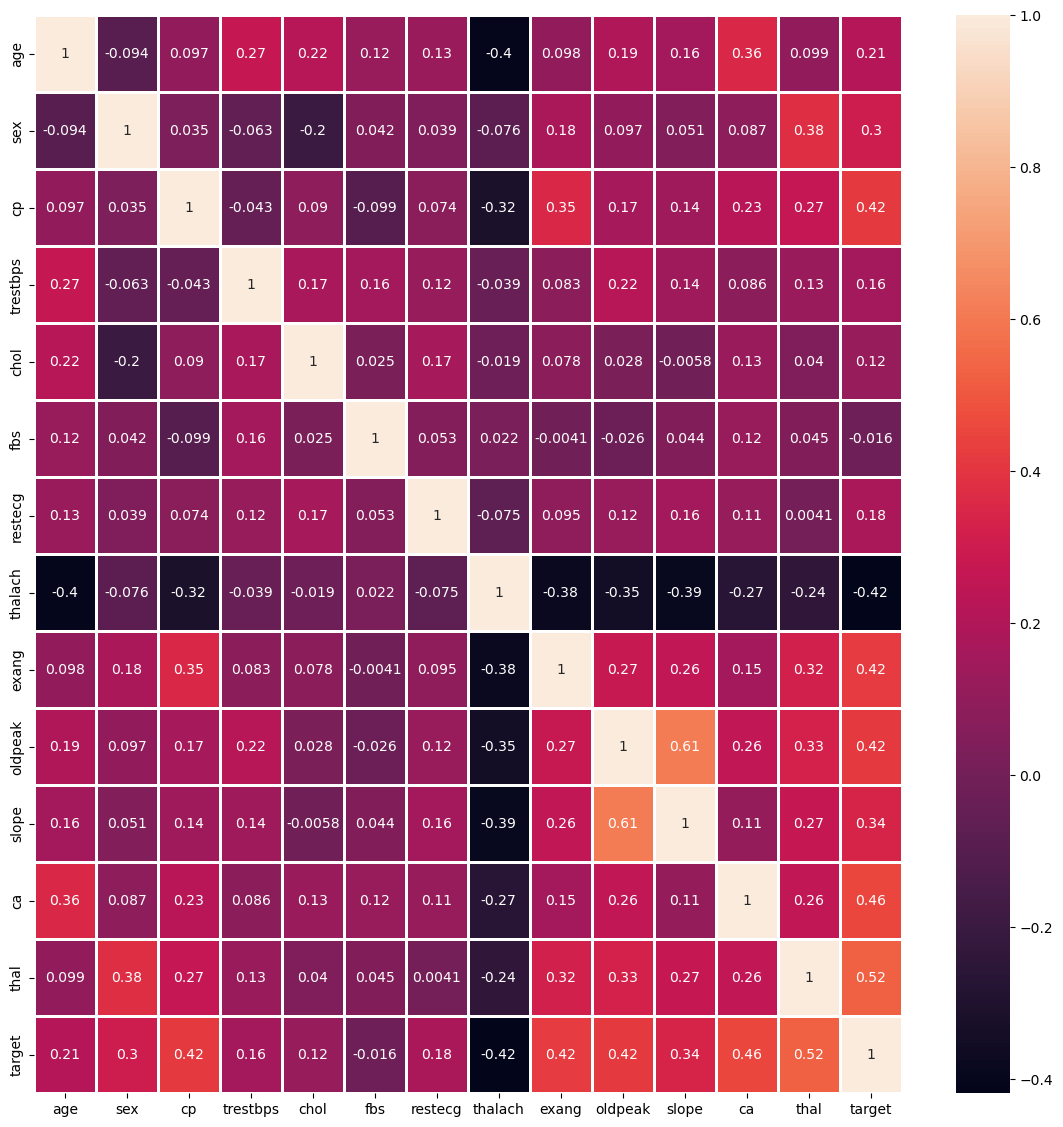

In [28]:
plt.figure(figsize=(14,14))
sns.heatmap(statlog.corr(),annot=True,linewidths=1)

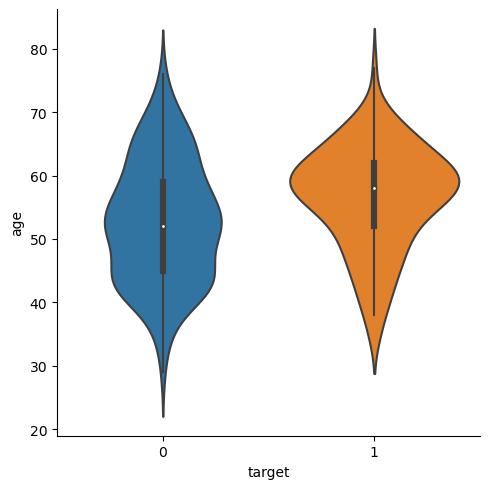

In [29]:
sns.catplot(x='target',y='age',data=statlog,kind='violin')

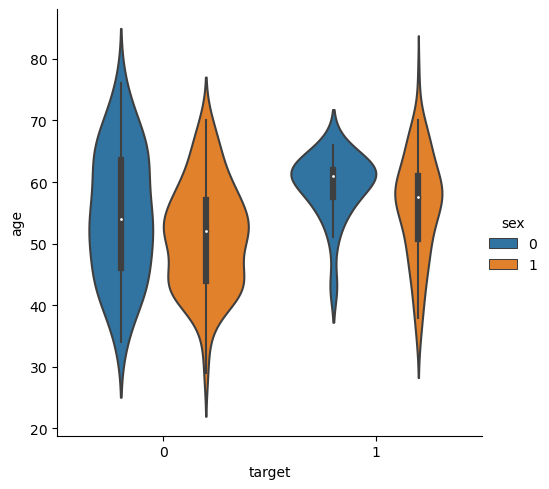

In [30]:
sns.catplot(x='target',y='age',hue='sex',data=statlog,kind='violin')

# KNeighborsClassifier

In [31]:
X=statlog.drop('target',axis=1)

In [32]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2


In [33]:
y=statlog['target']

In [34]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

In [35]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)
print('Données entrainment: ', X_train.shape)
print('Données de test: ', x_test.shape)

Données entrainment:  (216, 13)
Données de test:  (54, 13)


In [36]:
model=KNeighborsClassifier()

In [37]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
print('La performance du modèle sur la base des données d\'apprentissage: ', model.score(X_train, y_train))

La performance du modèle sur la base des données d'apprentissage:  0.7685185185185185


In [39]:
prediction=model.predict(x_test)

In [40]:
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [41]:
y_test

167    0
203    1
73     0
188    0
132    0
148    1
269    1
242    0
227    1
60     0
154    0
12     0
266    0
115    0
141    0
78     0
91     1
138    0
58     1
145    1
80     1
22     0
72     0
31     0
244    0
11     0
258    1
9      1
241    0
100    0
18     0
213    1
41     0
86     0
66     0
124    0
222    0
156    1
260    0
235    1
165    0
169    1
69     1
40     1
49     1
8      1
44     1
39     0
224    0
162    0
166    0
144    1
170    0
230    1
Name: target, dtype: int64

In [42]:
print('La performance du modèle sur la base des données de test :', model.score(x_test, y_test))

La performance du modèle sur la base des données de test : 0.6111111111111112


In [43]:
mse=mean_squared_error(y_test,prediction)

In [44]:
mse

0.3888888888888889

# Optimisation

## cros_val_score

In [45]:
score_validation = []
for k in range(1,26):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    score_validation.append(score)

In [46]:
score_validation

[0.6067099567099568,
 0.6396103896103896,
 0.662987012987013,
 0.6625541125541126,
 0.6861471861471862,
 0.6536796536796536,
 0.6722943722943724,
 0.6445887445887446,
 0.6452380952380953,
 0.6541125541125542,
 0.6725108225108224,
 0.6722943722943722,
 0.6677489177489176,
 0.6677489177489176,
 0.6816017316017315,
 0.6861471861471862,
 0.6904761904761905,
 0.6813852813852814,
 0.695021645021645,
 0.6675324675324676,
 0.680952380952381,
 0.6582251082251082,
 0.6722943722943724,
 0.6584415584415584,
 0.6766233766233766]

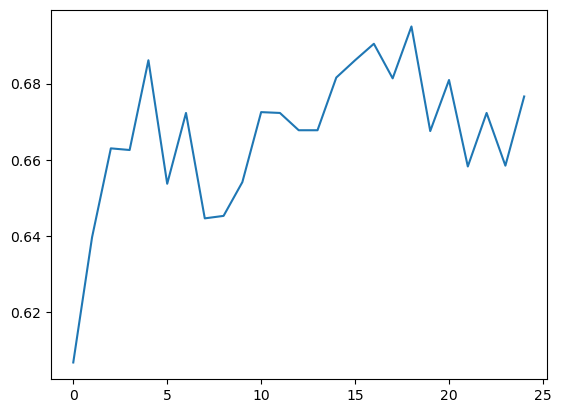

In [47]:
plt.plot(score_validation)

In [48]:
#le meilleur k c'est 18

## validation curve

In [49]:
model1=KNeighborsClassifier(18)

In [50]:
weights=['uniform','distance']
score_apprentissage,score_validation=validation_curve(model1,X_train,y_train,param_name='weights',param_range=weights,cv=10)

In [51]:
score_validation.shape

(2, 10)

In [52]:
score_validation.mean(axis=1)

array([0.68138528, 0.68571429])

In [63]:
#le meilleur weights c'est distance

## GridSearchCV

In [55]:
grid_param={'n_neighbors': np.arange(1,25),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']
           }

In [56]:
grid=GridSearchCV(KNeighborsClassifier(),grid_param,cv=10)

In [57]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [58]:
grid.best_score_

0.7277056277056277

In [59]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [60]:
model2=grid.best_estimator_

In [62]:
model2.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [64]:
model2.score(X_train,y_train)

1.0

In [65]:
model2.score(x_test,y_test)

0.6111111111111112

In [66]:
prediction1=model2.predict(x_test)

In [67]:
prediction1

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [68]:
y_test

167    0
203    1
73     0
188    0
132    0
148    1
269    1
242    0
227    1
60     0
154    0
12     0
266    0
115    0
141    0
78     0
91     1
138    0
58     1
145    1
80     1
22     0
72     0
31     0
244    0
11     0
258    1
9      1
241    0
100    0
18     0
213    1
41     0
86     0
66     0
124    0
222    0
156    1
260    0
235    1
165    0
169    1
69     1
40     1
49     1
8      1
44     1
39     0
224    0
162    0
166    0
144    1
170    0
230    1
Name: target, dtype: int64